# Stack Overflow Survey - Data Science Project

## 1. Business Understanding

### Introduction

The objective of this project is to Understand trends and patterns in the Stack Overflow developer community from 2017 onwards to provide insights for stakeholders such as tech companies, educators, and Stack Overflow itself.

In this project we study the Stack Overflow Survey - Multiple Years, which is publicly available [Here](https://survey.stackoverflow.co/)

### Questions to explore 

- Question 1 : How have the most common learning methods for coding changed over time?
- Question 2 : How has the popularity of well-known programming languages evolved over time?
- Question 3 : How does the adoption of AI vary across different age groups in 2024?
- Question 4 : What are the most significant challenges for users utilizing AI code assistants or GenAI tools?

These questions address real-world concerns such as AI adoption and AI challenges in tech, Popularity of programming language and educational trends.

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import textwrap

# Set visualization style for consistency
plt.style.use('seaborn')

C:\Users\Marc\AppData\Local\Temp\ipykernel_10492\3115024508.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 2. Data Understanding

### Data Gathering

In [2]:
# Define the main path to survey data
main_path = 'Stack-overflow-developper-survey'

def load_survey_data(directory_path):
    """
    Load survey data and schema data from specified directories into separate DataFrames for each year.

    Parameters:
    - directory_path (str): Path to the main directory containing survey folders.

    Returns:
    - dict: Dictionaries with years as keys and DataFrames as values.
    """
    survey_data = {}
    survey_schema = {}
    for folder in os.listdir(directory_path):
        try:
            year = int(folder[-4:])  # Extract year from folder name (last 4 characters)
            if 2017 <= year <= 2024:
                folder_path = os.path.join(directory_path, folder)
                public_file = os.path.join(folder_path, 'survey_results_public.csv')
                schema_file = os.path.join(folder_path, 'survey_results_schema.csv')
                
                # Load public data and add Year column
                df_public = pd.read_csv(public_file)
                df_public['Year'] = year  # Add year column for tracking
                survey_data[year] = df_public
                print(f"Loaded data for {year}: {public_file}")

                # Load schema
                df_schema = pd.read_csv(schema_file)
                survey_schema[year] = df_schema
                print(f"Loaded data for {year}: {schema_file}")
                
        except (ValueError, FileNotFoundError):
            continue  # Skip folders with invalid names or missing files
    return survey_data, survey_schema

# Load all survey data and schema into two distinct dictionary
survey_data , survey_schema = load_survey_data(main_path)

Loaded data for 2017: Stack-overflow-developper-survey\stack-overflow-developer-survey-2017\survey_results_public.csv
Loaded data for 2017: Stack-overflow-developper-survey\stack-overflow-developer-survey-2017\survey_results_schema.csv


C:\Users\Marc\AppData\Local\Temp\ipykernel_10492\3694247219.py:25: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_public = pd.read_csv(public_file)


Loaded data for 2018: Stack-overflow-developper-survey\stack-overflow-developer-survey-2018\survey_results_public.csv
Loaded data for 2018: Stack-overflow-developper-survey\stack-overflow-developer-survey-2018\survey_results_schema.csv
Loaded data for 2019: Stack-overflow-developper-survey\stack-overflow-developer-survey-2019\survey_results_public.csv
Loaded data for 2019: Stack-overflow-developper-survey\stack-overflow-developer-survey-2019\survey_results_schema.csv
Loaded data for 2020: Stack-overflow-developper-survey\stack-overflow-developer-survey-2020\survey_results_public.csv
Loaded data for 2020: Stack-overflow-developper-survey\stack-overflow-developer-survey-2020\survey_results_schema.csv
Loaded data for 2021: Stack-overflow-developper-survey\stack-overflow-developer-survey-2021\survey_results_public.csv
Loaded data for 2021: Stack-overflow-developper-survey\stack-overflow-developer-survey-2021\survey_results_schema.csv
Loaded data for 2022: Stack-overflow-developper-survey\s

### Data Assessment

In [3]:
## 1. Explore format of survey_data and survey_schema (type, structure, etc.)
print("### Exploring survey_data and survey_schema ###")
print(f"Type of survey_data: {type(survey_data)}")
print(f"Type of survey_schema: {type(survey_schema)}")
print(f"Years in survey_data: {list(survey_data.keys())}")
print(f"Years in survey_schema: {list(survey_schema.keys())}")

### Exploring survey_data and survey_schema ###
Type of survey_data: <class 'dict'>
Type of survey_schema: <class 'dict'>
Years in survey_data: [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Years in survey_schema: [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [4]:
# Check structure of one DataFrame in survey_data and survey_schema
sample_year = 2024  # Assuming 2024 is present
if sample_year in survey_data:
    print(f"\nStructure of survey_data[{sample_year}]:")
    print(survey_data[sample_year].info())
    print(f"\nStructure of survey_schema[{sample_year}]:")
    print(survey_schema[sample_year].info())


Structure of survey_data[2024]:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 115 entries, ResponseId to Year
dtypes: float64(13), int64(2), object(100)
memory usage: 57.4+ MB
None

Structure of survey_schema[2024]:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   qid         87 non-null     object
 1   qname       87 non-null     object
 2   question    87 non-null     object
 3   force_resp  66 non-null     object
 4   type        87 non-null     object
 5   selector    87 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB
None


In [5]:
## 2. Give overall statistics for each DataFrame in survey_data
print("\n### Overall Statistics for survey_data ###")
for year, df in survey_data.items():
    print(f"\nYear: {year}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(f"Missing values per column:\n{df.isnull().sum()}")
    print(f"Basic statistics:\n{df.describe()}")


### Overall Statistics for survey_data ###

Year: 2017
Number of rows: 51392
Number of columns: 155
Missing values per column:
Respondent                0
Professional              0
ProgramHobby              0
Country                   0
University                0
                      ...  
QuestionsConfusing    16973
InterestedAnswers     16780
Salary                38501
ExpectedSalary        48826
Year                      0
Length: 155, dtype: int64
Basic statistics:
         Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  51392.000000        42695.000000     40376.000000  20600.000000   
mean   25696.500000            7.300574         6.957078      3.952282   
std    14835.736854            1.955444         2.167652      7.564722   
min        1.000000            0.000000         0.000000      0.000000   
25%    12848.750000            6.000000         6.000000      1.000000   
50%    25696.500000            8.000000         7.000000      1.000000   
75

C:\Users\Marc\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Missing values per column:
ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith 

In [6]:
# Disable truncation for columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show al rows
pd.set_option('display.width', None)        # Adjust width automatically
pd.set_option('display.max_colwidth', None)

In [7]:
survey_schema[2017]

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


In [8]:
survey_schema[2024]

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a developer is ""someone who writes code"".*",True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your current employment status? Select all that apply.*,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying attention to the survey questions. Select ‘Apples’ from the list and you can get back to the survey.*<br><br>,True,MC,SAVR
5,QID297,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.,False,MC,MAVR
6,QID25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *,True,MC,SAVR
7,QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR
8,QID281,LearnCodeOnline,What online resources do you use to learn to code? Select all that apply.,False,MC,MAVR
9,QID331,TechDoc,What is the source of the technical documentation you use most often to learn to code? Select all that apply.,False,MC,MAVR


In [9]:
## 3. Use schema DataFrames in survey_schema to identify key columns
key_columns = ['LearnCode', 'HaveWorkedLanguage', 'LanguageWorkedWith', 'LanguageHaveWorkedWith', 'Age', 'AIChallenges', 'AISelect', 'Language']
print("\n### Identifying Key Columns ###")
for year, schema_df in survey_schema.items():
    if 'Column' in schema_df.columns:
        available_key_columns = schema_df[schema_df['Column'].isin(key_columns)]['Column'].tolist()
        print(f"Year {year}: Available key columns - {available_key_columns}")
    else:
        print(f"Year {year}: Schema does not contain 'Column' field.")
print('---------------------------------------------')
print('Change in schema structure: Column renamed in qname from 2021')
print('---------------------------------------------')
for year, schema_df in survey_schema.items():
    if 'qname' in schema_df.columns:
        available_key_columns = schema_df[schema_df['qname'].isin(key_columns)]['qname'].tolist()
        print(f"Year {year}: Available key columns - {available_key_columns}")
    else:
        print(f"Year {year}: Schema does not contain 'qname' field.")


### Identifying Key Columns ###
Year 2017: Available key columns - ['HaveWorkedLanguage']
Year 2018: Available key columns - ['LanguageWorkedWith', 'Age']
Year 2019: Available key columns - ['LanguageWorkedWith', 'Age']
Year 2020: Available key columns - ['Age', 'LanguageWorkedWith']
Year 2021: Schema does not contain 'Column' field.
Year 2022: Schema does not contain 'Column' field.
Year 2023: Schema does not contain 'Column' field.
Year 2024: Schema does not contain 'Column' field.
---------------------------------------------
Change in schema structure: Column renamed in qname from 2021
---------------------------------------------
Year 2017: Schema does not contain 'qname' field.
Year 2018: Schema does not contain 'qname' field.
Year 2019: Schema does not contain 'qname' field.
Year 2020: Schema does not contain 'qname' field.
Year 2021: Available key columns - ['LearnCode', 'Language', 'Age']
Year 2022: Available key columns - ['LearnCode', 'Language', 'Age']
Year 2023: Available

In [10]:
## 4. Head of raw data to verify data of interest in key columns
print("\n### Verifying Data in Key Columns ###")
for year, df in survey_data.items():
    print(f"\nYear: {year}")
    available_columns = [col for col in key_columns if col in df.columns]
    if available_columns:
        print(f"Head of key columns:\n{df[available_columns].head(5)}")
        for col in available_columns:
            print(f"\nValue counts for {col}:\n{df[col].value_counts().head(5)}")
    else:
        print("No key columns available for this year.")


### Verifying Data in Key Columns ###

Year: 2017
Head of key columns:
              HaveWorkedLanguage
0                          Swift
1  JavaScript; Python; Ruby; SQL
2              Java; PHP; Python
3         Matlab; Python; R; SQL
4                            NaN

Value counts for HaveWorkedLanguage:
HaveWorkedLanguage
C#; JavaScript; SQL     1276
JavaScript; PHP; SQL    1143
Java                     913
JavaScript               807
JavaScript; PHP          662
Name: count, dtype: int64

Year: 2018
Head of key columns:
                                 LanguageWorkedWith                Age
0                        JavaScript;Python;HTML;CSS  25 - 34 years old
1                      JavaScript;Python;Bash/Shell  35 - 44 years old
2                                               NaN                NaN
3  C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell  35 - 44 years old
4                C;C++;Java;Matlab;R;SQL;Bash/Shell  18 - 24 years old

Value counts for LanguageWorkedWith:
Langu

## 3. Data Preparation

In [11]:
# We prepare Data Cleaning functions for later use
def clean_categorical_column(df, column_name, fill_value='Unknown'):
    """
    Clean a categorical column by filling missing values and converting to category type.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Column to clean.
    - fill_value (str): Value to fill missing entries (default: 'Unknown').

    Returns:
    - pd.Series: Cleaned categorical column.
    """
    if column_name in df.columns:
        return df[column_name].fillna(fill_value).astype('category')
    return None

def clean_numeric_column(df, column_name, strategy='median'):
    """
    Clean a numeric column by imputing missing values with median or mean.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Column to clean.
    - strategy (str): Imputation method ('median' or 'mean', default: 'median').

    Returns:
    - pd.Series: Cleaned numeric column.
    """
    if column_name in df.columns:
        if strategy == 'median':
            fill_value = df[column_name].median()
        else:
            fill_value = df[column_name].mean()
        return df[column_name].fillna(fill_value)
    return None

In [12]:
def check_missing_values(key_columns, survey_data):
    """
    Check and print the number of missing values in specified key columns for each year's survey data.

    Parameters:
    - key_columns (list of str): List of column names to check for missing values. 
    - survey_data (dict): Dictionary where keys are years (int or str) and values are pandas DataFrames 
                          containing survey data for that year.
    """
    for year, df in survey_data.items():
        print(f"\n### Missing Values in Key Columns for {year}:")
        available_columns = [col for col in key_columns if col in df.columns]
        if available_columns:
            print(df[available_columns].isnull().sum())
        else:
            print("No key columns available for this year.")

In [13]:
# Check missing values in key columns for each year
check_missing_values(key_columns, survey_data)


### Missing Values in Key Columns for 2017:
HaveWorkedLanguage    14767
dtype: int64

### Missing Values in Key Columns for 2018:
LanguageWorkedWith    20521
Age                   34281
dtype: int64

### Missing Values in Key Columns for 2019:
LanguageWorkedWith    1314
Age                   9673
dtype: int64

### Missing Values in Key Columns for 2020:
LanguageWorkedWith     7083
Age                   19015
dtype: int64

### Missing Values in Key Columns for 2021:
LearnCode                  476
LanguageHaveWorkedWith    1082
Age                       1032
dtype: int64

### Missing Values in Key Columns for 2022:
LearnCode                 1688
LanguageHaveWorkedWith    2293
Age                       2322
dtype: int64

### Missing Values in Key Columns for 2023:
LearnCode                 1521
LanguageHaveWorkedWith    2044
Age                          0
AISelect                  1211
dtype: int64

### Missing Values in Key Columns for 2024:
LearnCode                  4949
LanguageHaveW

In [14]:
# Missing values are handled for the rest of the analysis by using the clean_categorical_column function on all categorical columns of interest.
# Missing values are replace with the value 'Unknown'. Later to be filtered depending on the analysis requirement.
for year, df in survey_data.items():
    for col in key_columns:
        if col in df.columns:
            df[col] = clean_categorical_column(df, col)

In [15]:
# Check missing values again after cleaning in key columns for each year
check_missing_values(key_columns, survey_data)


### Missing Values in Key Columns for 2017:
HaveWorkedLanguage    0
dtype: int64

### Missing Values in Key Columns for 2018:
LanguageWorkedWith    0
Age                   0
dtype: int64

### Missing Values in Key Columns for 2019:
LanguageWorkedWith    0
Age                   0
dtype: int64

### Missing Values in Key Columns for 2020:
LanguageWorkedWith    0
Age                   0
dtype: int64

### Missing Values in Key Columns for 2021:
LearnCode                 0
LanguageHaveWorkedWith    0
Age                       0
dtype: int64

### Missing Values in Key Columns for 2022:
LearnCode                 0
LanguageHaveWorkedWith    0
Age                       0
dtype: int64

### Missing Values in Key Columns for 2023:
LearnCode                 0
LanguageHaveWorkedWith    0
Age                       0
AISelect                  0
dtype: int64

### Missing Values in Key Columns for 2024:
LearnCode                 0
LanguageHaveWorkedWith    0
Age                       0
AIChallenges     

## 4. Data Analysis

This section uses the previous data to answer 4 questions of interest :
- Question 1 : How have the most common learning methods for coding changed over time?
- Question 2 : How has the popularity of well-known programming languages evolved over time?
- Question 3 : How does the adoption of AI vary across different age groups in 2024?
- Question 4 : What are the most significant challenges for users utilizing AI code assistants or GenAI tools?


Each of those questions is addressed in 3 detailed steps:
- Modelization
- Visualization
- Evaluation of results

### Question 1: How have the most common learning methods for coding changed over time?

#### Modelization

In [16]:
# Select relevant columns from 2021–2024 for future LearnCode analysis
learncode_dfs = []
for year in range(2021, 2025):
    if year in survey_data and 'LearnCode' in survey_data[year].columns:
        df = survey_data[year][['LearnCode', 'Year']].copy()
        learncode_dfs.append(df)

In [17]:
# Combine only the selected data
learncode_data = pd.concat(learncode_dfs, ignore_index=True)

In [18]:
# Drop rows with 'Unknown' LearnCode (optional, depending on analysis needs)
learncode_data = learncode_data[learncode_data['LearnCode'] != 'Unknown']

In [19]:
# Split and explode LearnCode
learncode_data['LearnCode'] = learncode_data['LearnCode'].str.split(';')
exploded_data = learncode_data.explode('LearnCode')

In [20]:
# Checking on categories
exploded_data['LearnCode'].value_counts()

LearnCode
Books / Physical media                                                   157544
Online Courses or Certification                                          140362
Other online resources (e.g., videos, blogs, forum)                      121000
School (i.e., University, College, etc)                                  118185
On the job training                                                       96147
Colleague                                                                 62194
Other online resources (e.g., videos, blogs, forum, online community)     49654
Other online resources (ex: videos, blogs, etc)                           49392
School                                                                    44462
Friend or family member                                                   41463
Coding Bootcamp                                                           31332
Online Forum                                                              26229
Other (please specify):       

In [21]:
# Harmonize learning method entries
learning_method_mapping = {
    "Other online resources (e.g., videos, blogs, forum)": "Other Online Resources",
    "Other online resources (ex: videos, blogs, etc., online community)": "Other Online Resources",
    "School (i.e., University, College, etc)": "School",
    "Online Forum": "Other Online Resources",
    "Other online resources (e.g., videos, blogs, forum, online community)": "Other Online Resources",
    "Other online resources (ex: videos, blogs, etc)": "Other Online Resources",
    "Colleague": "On the job training"
}

exploded_data['LearnCode'] = exploded_data['LearnCode'].replace(learning_method_mapping)

In [22]:
# Checking again on categories
exploded_data['LearnCode'].value_counts()

LearnCode
Other Online Resources               246275
School                               162647
On the job training                  158341
Books / Physical media               157544
Online Courses or Certification      140362
Friend or family member               41463
Coding Bootcamp                       31332
Other (please specify):               19568
Hackathons (virtual or in-person)     12302
Name: count, dtype: int64

In [23]:
# Calculate proportions
respondents_per_year = learncode_data.groupby('Year').size().reset_index(name='total_respondents')
method_counts = exploded_data.groupby(['Year', 'LearnCode']).size().reset_index(name='count')
method_counts = method_counts.merge(respondents_per_year, on='Year')
method_counts['proportion'] = method_counts['count'] / method_counts['total_respondents']

In [24]:
# Identify top methods
top_methods = method_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'proportion')).reset_index(drop=True)
unique_top_methods = top_methods['LearnCode'].unique()
filtered_data = method_counts[method_counts['LearnCode'].isin(unique_top_methods)]
pivot_data = filtered_data.pivot(index='Year', columns='LearnCode', values='proportion').fillna(0)

C:\Users\Marc\AppData\Local\Temp\ipykernel_10492\850853365.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_methods = method_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'proportion')).reset_index(drop=True)


In [25]:
pivot_data

LearnCode,Books / Physical media,Friend or family member,On the job training,Online Courses or Certification,Other Online Resources,School
Year,,,,,,
2021,0.515314,0.182756,0.171462,0.403927,0.911503,0.535926
2022,0.544761,0.139522,0.582719,0.466317,0.709081,0.621766
2023,0.517961,0.113343,0.694740,0.492808,0.801296,0.501432
2024,0.502447,0.105442,0.686120,0.500446,0.820890,0.491370


#### Visualization

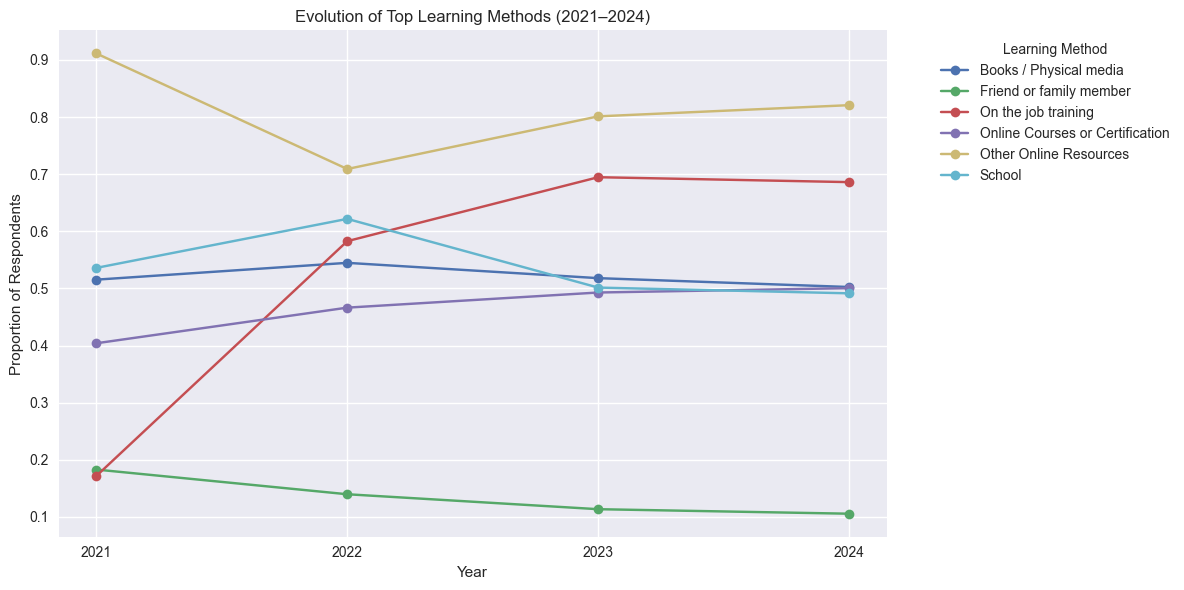

In [26]:
# Plot
pivot_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolution of Top Learning Methods (2021–2024)')
plt.xlabel('Year')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Learning Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(range(2021, 2025))
plt.tight_layout()
plt.show()

#### Evaluation of results


**Overall Commentary**

The data reveals several key trends in learning preferences from 2021 to 2024:


- **Rise of Digital Learning**:  
    - Other Online Resources and Online Courses or Certification remain highly utilized, with the latter showing consistent growth. This reflects a strong preference for digital, scalable learning solutions, likely due to their accessibility and relevance.  

    - The sharp drop in Other Online Resources from 2021 to 2022, followed by a rebound, may suggest an initial exploration of alternatives before settling into a stable reliance on digital content.

--------------------------

- **Emphasis on Practical Skills**:  
    - On the job training sees a remarkable rise from 2021 to 2023, leveling off in 2024. This underscores the growing importance of experiential learning, particularly in professional contexts where applicable skills are critical.


---------------------------------------

- **Decline of Traditional and Informal Methods**:  
    - Books / Physical media peak in 2022 but decline thereafter, indicating a gradual move away from physical resources.  

    - Friend or family member steadily decreases, suggesting that informal learning is being replaced by formal, structured options.  

    - School peaks in 2022 but drops in subsequent years, pointing to a potential shift in preference away from conventional education systems.


**Broader Implications**

These trends highlight a shift toward flexible, digital, and practical learning methods over traditional or informal ones. Key takeaways for educational providers and employers include:

- **Strengthening Digital Platforms**: The growing reliance on online courses and resources calls for continued investment in high-quality, accessible digital offerings.  

- **Promoting Practical Training**: The surge in on-the-job training suggests a need to integrate more experiential learning opportunities into educational and professional development programs.  

- **Innovating Traditional Education**: Schools may need to adapt—perhaps through hybrid models or specialized programs—to remain competitive in a changing learning landscape.

This analysis offers a clear picture of evolving learning preferences from 2021 to 2024, emphasizing the importance of adaptability in meeting learners' needs.



### Question 2: How has the popularity of well-known programming languages evolved over time?

#### Modelization

In [27]:
def get_language_column(year):
    """
    Determine the language column name based on the survey year.

    Parameters:
    - year (int): Survey year.

    Returns:
    - str: Name of the language column for that year.
    """
    if year == 2017:
        return 'HaveWorkedLanguage'
    elif 2018 <= year <= 2020:
        return 'LanguageWorkedWith'
    else:  # 2021–2024
        return 'LanguageHaveWorkedWith'

In [28]:
def calculate_language_percentages(df, lang_column, target_languages):
    """
    Calculate the percentage of respondents using each programming language.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - lang_column (str): Column containing language data.
    - target_languages (list): List of languages to analyze.

    Returns:
    - dict: Language percentages.
    """
    if lang_column not in df.columns:
        return {lang: 0 for lang in target_languages}  # Return 0% if column missing
    lang_series = df[lang_column][df[lang_column] != 'Unknown']
    lang_list = lang_series.str.split(';').apply(lambda x: [l.strip() for l in x])
    total_respondents = len(lang_list)
    if total_respondents == 0:
        return {lang: 0 for lang in target_languages}
    return {lang: (lang_list.apply(lambda x: lang in x).sum() / total_respondents * 100) 
            for lang in target_languages}

In [29]:
# Define languages to analyze
languages = ['JavaScript', 'Python', 'SQL', 'Java', 'C#', 'C++', 'C']

In [30]:
# Calculate language percentages for each year
language_data = {
    year: calculate_language_percentages(survey_data[year], get_language_column(year), languages)
    for year in range(2017, 2025) if year in survey_data
}

In [31]:
popularity_df = pd.DataFrame(language_data).T

In [32]:
popularity_df

,JavaScript,Python,SQL,Java,C#,C++,C
2017,62.457338,31.956314,51.205461,39.655973,34.064164,22.266212,19.041638
2018,69.811321,38.755840,57.025047,45.345572,34.409069,25.368295,23.032144
2019,67.625530,41.616325,54.293186,41.015656,30.943599,23.437518,20.574633
2020,67.660079,44.070898,54.747464,40.214019,31.442365,23.888947,21.762697
2021,65.066722,48.316476,47.154462,35.409255,27.907767,24.353728,21.041320
2022,65.435717,48.122578,49.492075,33.313138,28.014089,22.576964,19.291300
2023,63.932752,49.527198,48.913243,30.705761,27.763369,22.531558,19.439982
2024,62.753368,51.416855,51.354925,30.528078,27.312746,23.143359,20.393338


#### Visualization

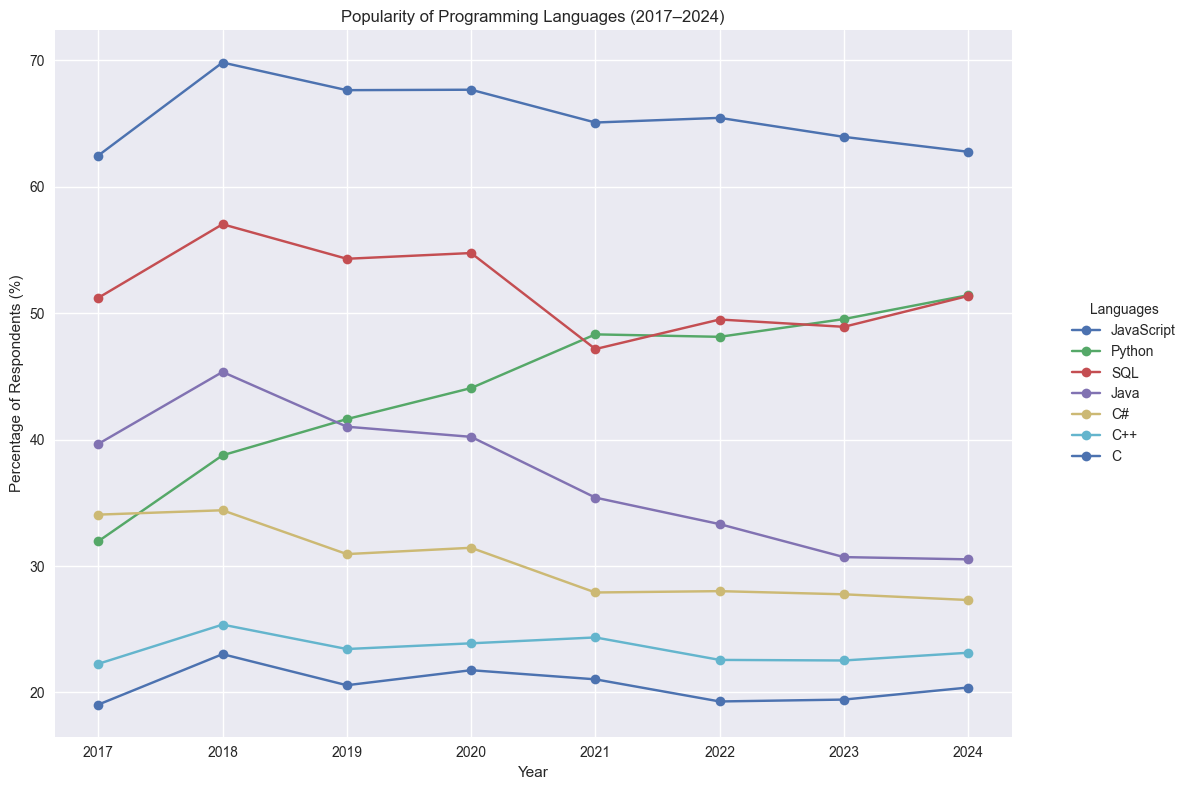

In [33]:
#  plot the result
plt.figure(figsize=(12, 8))
for lang in languages:
    plt.plot(popularity_df.index, popularity_df[lang], marker='o', label=lang)
plt.title('Popularity of Programming Languages (2017–2024)')
plt.xlabel('Year')
plt.ylabel('Percentage of Respondents (%)')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.grid(True)
plt.xticks(range(2017, 2025))
plt.tight_layout()
plt.show()

#### Evaluation of results

**Overall Commentary**

The data highlights distinct trends in programming language popularity over the eight-year period:

- **JavaScript's Leadership**: JavaScript remains the most widely used language, despite a slight decline after 2018. Its dominance in web development ensures its continued relevance, with usage stabilizing above 60%.

- **Python's Ascendance**: Python’s steady rise from 31.96% to 51.42% marks it as the standout gainer, nearly closing the gap with JavaScript. Its versatility across data science, AI, and web development fuels this growth.

- **Decline of Java and C#**: Both Java and C# peak in 2018 but lose significant ground by 2024 (Java down ~15%, C# down ~7%). This may reflect competition from Python and JavaScript or shifts in enterprise and development preferences.

- **SQL and C++ Stability**: SQL hovers around 50%, reinforcing its indispensability in data management, while C++ holds steady at ~23%, driven by its niche in high-performance applications.

- **C’s Consistency**: C maintains a stable presence around 20%, supported by its use in education and systems programming, though it lacks the growth of higher-level languages.



**Broader Implications**

  These trends reveal a shifting programming landscape influenced by versatility and emerging technologies:

- **Web and Data Focus**: The prominence of JavaScript and Python underscores the demand for skills in web development and data-related fields. Developers should prioritize these languages to stay competitive.

- **Enterprise Evolution**: The decline of Java and C# suggests enterprises may be adapting to newer tools or languages like Python, signaling a need for modernization.

- **Niche Resilience**: C++ and C retain stable usage in specialized areas, indicating sustained value for expertise in performance-oriented or foundational programming.

This analysis offers a snapshot of how developer preferences have evolved from 2017 to 2024, reflecting the growing influence of web, data, and AI-driven technologies in shaping language popularity.



### Question 3: How does the adoption of AI vary across different age groups in 2024?

#### Modelization 

In [34]:
# Access and copy 2024 data
results_2024 = survey_data[2024].copy()

In [35]:
filtered_df = results_2024[(results_2024['AISelect'] != 'Unknown') & (results_2024['Age'] != 'Unknown')]

In [36]:
filtered_df = filtered_df.copy()

# Define a mapping to reformat age categories into concise labels
age_mapping = {
    'Under 18 years old': 'Under 18', 
    '18-24 years old': '18-24', 
    '25-34 years old': '25-34',
    '35-44 years old': '35-44', 
    '45-54 years old': '45-54', 
    '55-64 years old': '55-64',
    '65 years or older': '65 +', 
    'Prefer not to say': 'Prefer not to say'
}

# Rename the categories in the 'Age' column using the categorical accessor
renamed_age = filtered_df['Age'].cat.rename_categories(age_mapping)

# Assign the renamed categories to a new column 'age_clean' safely
filtered_df.loc[:, 'age_clean'] = renamed_age

In [37]:
# Create crosstab of AI adoption by age group
ai_adoption_by_age = pd.crosstab(filtered_df['age_clean'], filtered_df['AISelect'], normalize='index') * 100

In [38]:
filtered_df['AISelect'].value_counts()

AISelect
Yes                        37662
No, and I don't plan to    14837
No, but I plan to soon      8408
Unknown                        0
Name: count, dtype: int64

In [39]:
ai_adoption_by_age

AISelect,"No, and I don't plan to","No, but I plan to soon",Yes
age_clean,,,
18-24,20.848694,8.753628,70.397678
25-34,21.466606,12.964801,65.568592
35-44,25.913339,16.142736,57.943925
45-54,27.990670,19.393535,52.615795
55-64,36.981891,22.132797,40.885312
65 +,47.311828,20.430108,32.258065
Prefer not to say,41.877256,13.718412,44.404332
Under 18,29.374472,9.932375,60.693153


#### Visualization

In [40]:
# Define order for plotting
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 +', 'Prefer not to say']
ai_select_order = ['Yes', 'No, but I plan to soon', 'No, and I don\'t plan to']
ai_adoption_by_age = ai_adoption_by_age.loc[age_order, ai_select_order]

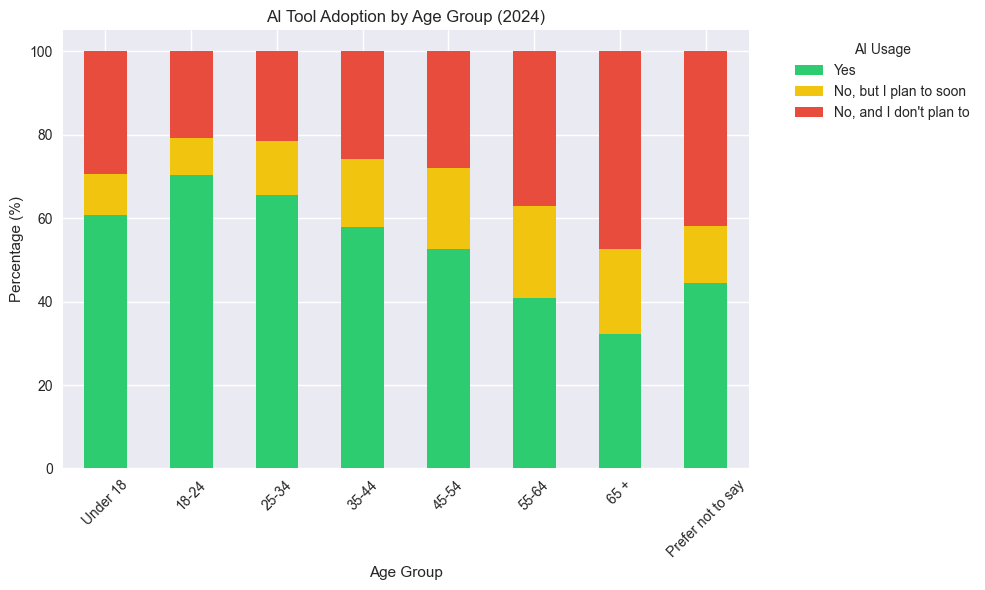

In [41]:
# Plot stacked bar chart
ai_adoption_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#f1c40f', '#e74c3c'])
plt.title('AI Tool Adoption by Age Group (2024)')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='AI Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Evaluation of results

**Key Observations**

- **Current AI Adoption ("Yes")**
    - Younger age groups exhibit the highest adoption rates. The "18-24" group leads with 70.40%, followed by "25-34" at 65.57% and "Under 18" at 60.69%.

    - Adoption declines steadily with age. The "55-64" group reports 40.89%, and the "65+" group has the lowest rate at 32.26%.

    - The "Prefer not to say" group, with 44.40%, falls between the younger and older age groups, possibly reflecting a mix of ages or distinct behavioral traits.

- **Future Intent to Adopt AI ("No, but I plan to soon")**
    - Intent to adopt AI soon ranges from 8.75% ("18-24") to 22.13% ("55-64"), showing moderate variation across groups.

    - Older age groups, particularly "55-64" (22.13%) and "65+" (20.43%), express higher intent despite lower current usage, suggesting a potential shift toward adoption in the near future.

- Younger groups, like "18-24" (8.75%) and "Under 18" (9.93%), show lower intent, likely because many are already using AI.

- **Lack of Interest in AI ("No, and I don't plan to")**
    - Resistance to AI adoption increases with age. The "18-24" group has the lowest resistance at 20.85%, while "65+" has the highest at 47.31%.

    - Middle age groups, such as "35-44" (25.91%) and "45-54" (27.99%), show moderate resistance, while "Prefer not to say" reports a high 41.88%, aligning closer to older groups.

**Overall Commentary**

The 2024 survey data reveals a clear generational divide in AI adoption. Younger age groups (Under 18 to 34) are the most active users, with adoption rates exceeding 60%, likely due to greater exposure to AI in education, work, and daily life. In contrast, older groups (55-64 and 65+) show significantly lower adoption (below 41%) and higher resistance (up to 47.31%), possibly due to unfamiliarity or perceived irrelevance of AI to their needs.

Interestingly, the "55-64" and "65+" groups express notable intent to adopt AI soon (22.13% and 20.43%, respectively), hinting at a potential narrowing of the adoption gap if barriers like accessibility or education are addressed. The "Prefer not to say" group’s mixed responses suggest it may encompass individuals across the age spectrum with varied attitudes toward AI.

For stakeholders in AI development and policy, these findings highlight the need for targeted strategies—such as simplified tools or training programs—to boost adoption among older populations, while continuing to leverage the enthusiasm of younger users. The data underscores both the opportunities and challenges in achieving widespread AI engagement across all age demographics in 2024.



### Question 4: What are the most significant challenges for users utilizing AI code assistants or GenAI tools?


#### Modelization

In [42]:
# Access and copy 2024 data for AI challenges
challenge_data = survey_data[2024][['AIChallenges']].copy()
total_respondents = challenge_data[challenge_data['AIChallenges'] != 'Unknown'].shape[0]

In [43]:
# Explode and count challenges
challenge_data['AIChallenges'] = challenge_data['AIChallenges'].str.split(';')
exploded_challenges = challenge_data.explode('AIChallenges')
exploded_challenges = exploded_challenges[exploded_challenges['AIChallenges'] != 'Unknown']
challenge_counts = exploded_challenges['AIChallenges'].value_counts()[:8]

In [44]:
challenge_counts

AIChallenges
Don’t trust the output or answers                                                      24450
AI tools lack context of codebase,  internal architecture, and/or company knowledge    23225
We don’t have the right policies in place to reduce security risks                     12192
Lack of proper training and education on new tools                                     11843
Not everyone uses them                                                                  9450
They create more work (more code/PRs to review, etc.)                                   5175
Lack of executive buy-in                                                                4333
Other (please specify):                                                                 2347
Name: count, dtype: int64

#### visualization

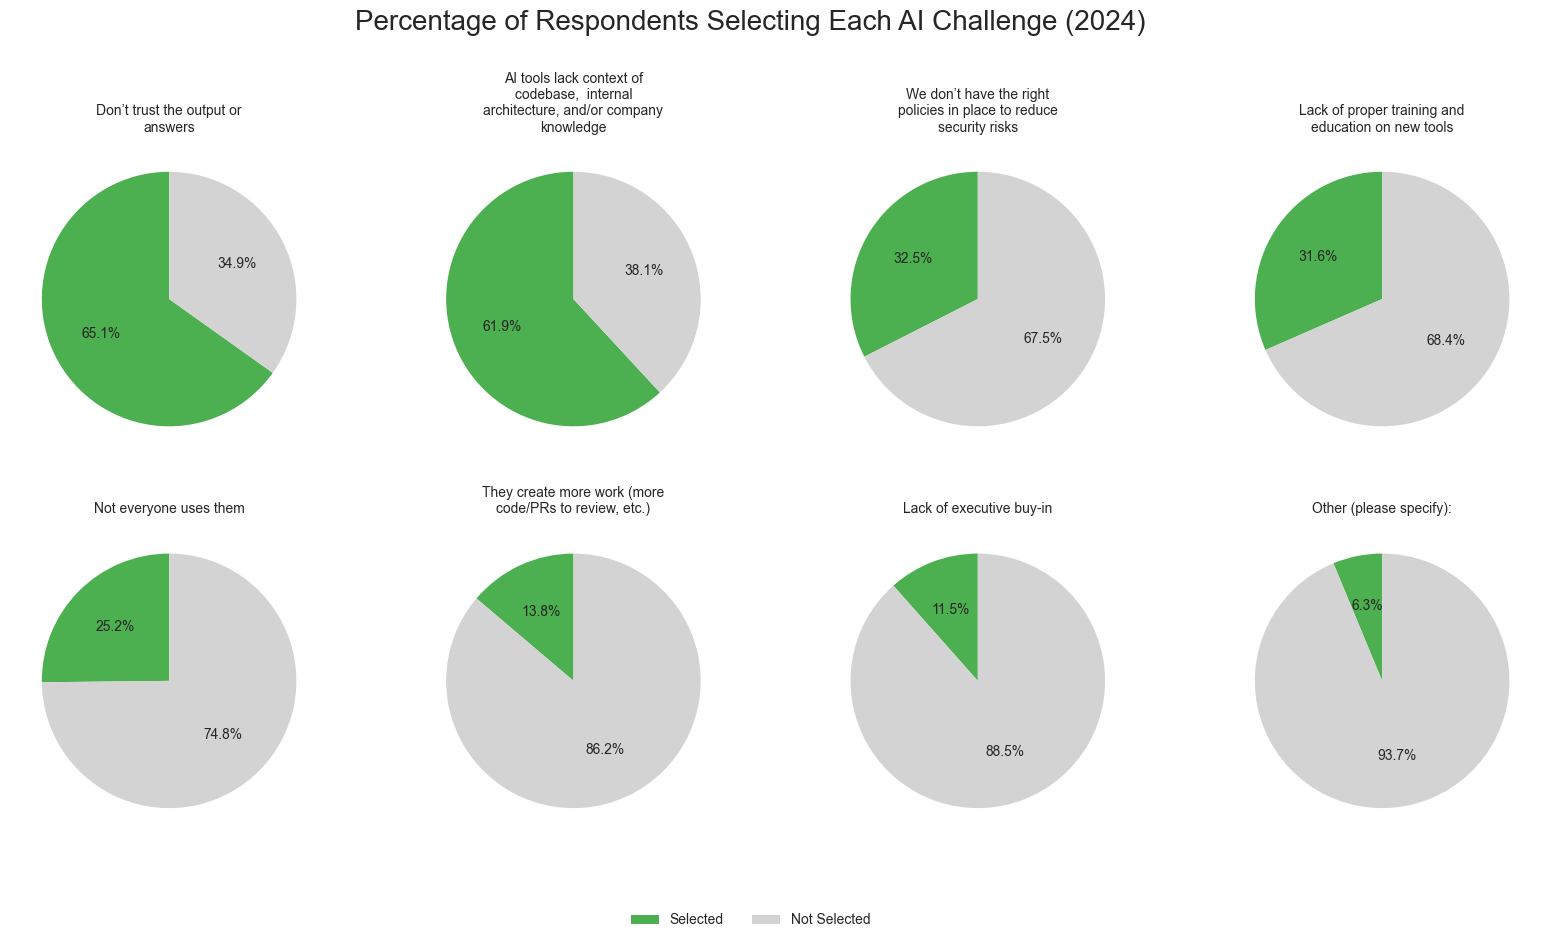

In [45]:
# Plot pie charts for top 8 challenges
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
colors = ['#4CAF50', '#D3D3D3']  # Green for Selected, Gray for Not Selected


for i, challenge in enumerate(challenge_counts.index):
    selected = challenge_counts[challenge]
    sizes = [selected, total_respondents - selected]
    axes[i].pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    axes[i].set_title(textwrap.fill(challenge, width=30), fontsize=10)

# Add legend and title
# Define handles and labels separately
handles = [
    Patch(facecolor='#4CAF50'),
    Patch(facecolor='#D3D3D3')
]
labels = ['Selected', 'Not Selected']
# Add the legend with both arguments
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=2)

# Adjust the layout to add space
# - bottom=0.15 reserves space for the legend
# - top=0.85 increases space between the title and pie charts
fig.subplots_adjust(bottom=0.15, top=0.85)

fig.suptitle('Percentage of Respondents Selecting Each AI Challenge (2024)', fontsize=20)
#plt.tight_layout()
plt.show()

#### Evaluation of results

**Key Observations**


- **1. Trust Issues Lead the Way**
    - **Challenge**: "Don’t trust the output or answers"
    - **Respondents**: 65.1 %
    - **Insight**: The most frequently cited challenge reflects deep skepticism about the reliability of AI-generated outputs. This lack of trust could stem from inconsistent or incorrect results, posing a significant barrier to widespread adoption.  

----------------------------

- **2. Contextual Blind Spots**
    - **Challenge**: "AI tools lack context of codebase, internal architecture, and/or company knowledge"
    - **Respondents**: 61.9 %
    - **Insight**: Nearly as prevalent as trust issues, this challenge highlights a critical limitation: AI tools often fail to understand the specific context of a user’s codebase or organization. This gap reduces their utility in complex, proprietary environments.

-------------------------

- **3. Security Policy Gaps**
    - **Challenge**: "We don’t have the right policies in place to reduce security risks"
    - **Respondents**: 32.5 %
    - **Insight**: Over 12,000 respondents flagged inadequate security policies, suggesting that organizations are struggling to govern AI tools effectively and mitigate associated risks.

----------------------

- **4. Training Deficiencies**
    - **Challenge**: "Lack of proper training and education on new tools"
    - **Respondents**: 31.6 %
    - **Insight**: Without sufficient training, users may not fully leverage AI tools, underscoring the need for educational investment to bridge this gap.

------------------

- **5. Uneven Adoption**
    - **Challenge**: "Not everyone uses them"
    - **Respondents**: 25.2 %
    - **Insight**: Uneven adoption across teams or individuals could indicate resistance to change, lack of awareness, or perceived inefficacy of AI tools.

-------------------

- **6. Increased Workload**
    - **Challenge**: "They create more work (more code/PRs to review, etc.)"
    - **Respondents**: 13.8 %
    - **Insight**: For some, AI tools add complexity rather than efficiency, such as generating additional code or pull requests that require review.

-----------------------

- **7. Leadership Support Lacking**
    - **Challenge**: "Lack of executive buy-in"
    - **Respondents**: 11.5 %
    - **Insight**: Without leadership endorsement, AI adoption may stall, potentially due to unclear benefits or strategic misalignment.

-----------------------

- **8. Miscellaneous Concerns**
    - **Challenge**: "Other (please specify):"
    - **Respondents**: 6.3 %
    - **Insight**: A smaller group identified unique or less common challenges, which could warrant further exploration to uncover niche issues.

**Commentary**

The 2024 survey data paints a clear picture: trust and context are the twin pillars of AI tool challenges. The leading concern—lack of trust in AI outputs—suggests that users need greater transparency, accuracy, and validation mechanisms to feel confident in these tools. Closely related, the lack of contextual awareness reveals a technical limitation: AI tools must evolve to better integrate domain-specific knowledge and adapt to unique organizational needs.

Beyond technical hurdles, organizational factors play a significant role. The absence of security policies and proper training indicates that successful AI adoption requires more than just better tools—it demands robust governance and user enablement. Meanwhile, issues like uneven adoption and increased workload hint at practical challenges: AI tools must streamline workflows rather than complicate them, and their value must be evident to all stakeholders, from users to executives.

For developers and leaders, these findings highlight a dual mandate: enhance AI reliability and context-awareness while addressing human and organizational barriers. Overcoming these challenges will be essential to unlocking the transformative potential of AI code assistants and GenAI tools in 2024 and beyond.



## 5. Conclusion

Based on the analysis of Stack Overflow survey data from 2017 to 2024, the coding landscape has undergone significant evolution across multiple dimensions.

- **Learning Methods**: Developers have increasingly shifted towards flexible, online resources and courses, moving away from traditional methods like books and in-person training.

- **Language Popularity**: Versatile languages such as Python and JavaScript have grown in prominence, while languages like Java and C# have seen declining usage.

- **AI Adoption**: In 2024, younger developers are more likely to embrace AI tools, whereas older developers exhibit greater skepticism or disinterest.

- **AI Challenges**: Significant hurdles include trust in AI-generated outputs, lack of contextual understanding, and organizational barriers like insufficient training.

Collectively, these trends highlight a move toward modernization and adaptability in the tech industry. The rise of digital learning and newer languages reflects changing skill demands, while AI’s growing role—tempered by persistent challenges—suggests that future success will depend on continuous learning and strategic integration of emerging technologies.

